In [ ]:
pip install pandas prophet matplotlib scikit-learn numpy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Load the CSV file with correct encoding
df = pd.read_csv('/content/sales_data_sample.csv', encoding='ISO-8859-1')

# Rename columns for Prophet
df['ds'] = pd.to_datetime(df['ORDERDATE'])
df['y'] = df['SALES']
df = df[['ds', 'y']]

# View the cleaned data
print(df.head())


          ds        y
0 2003-02-24  2871.00
1 2003-05-07  2765.90
2 2003-07-01  3884.34
3 2003-08-25  3746.70
4 2003-10-10  5205.27


In [ ]:
# Split data into train and test
train = df.iloc[:-30]
test = df.iloc[-30:]


In [ ]:
sdate=input("Enter the start date in yyyy-mm-dd format")
edate=input("Enter the end date in yyyy-mm-dd format")
# Create a DataFrame of holidays
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime([sdate, edate]),
    'lower_window': 0,
    'upper_window': 1,
})

Enter the start date in yyyy-mm-dd format2020-10-20
Enter the end date in yyyy-mm-dd format2020-11-10


In [ ]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=0.05  # Tuning the flexibility of trend changes
)

In [ ]:
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmps8k0oxf4/ibfn9cmy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps8k0oxf4/m0hth2o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92707', 'data', 'file=/tmp/tmps8k0oxf4/ibfn9cmy.json', 'init=/tmp/tmps8k0oxf4/m0hth2o_.json', 'output', 'file=/tmp/tmps8k0oxf4/prophet_modelt82gim2v/prophet_model-20250528092609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

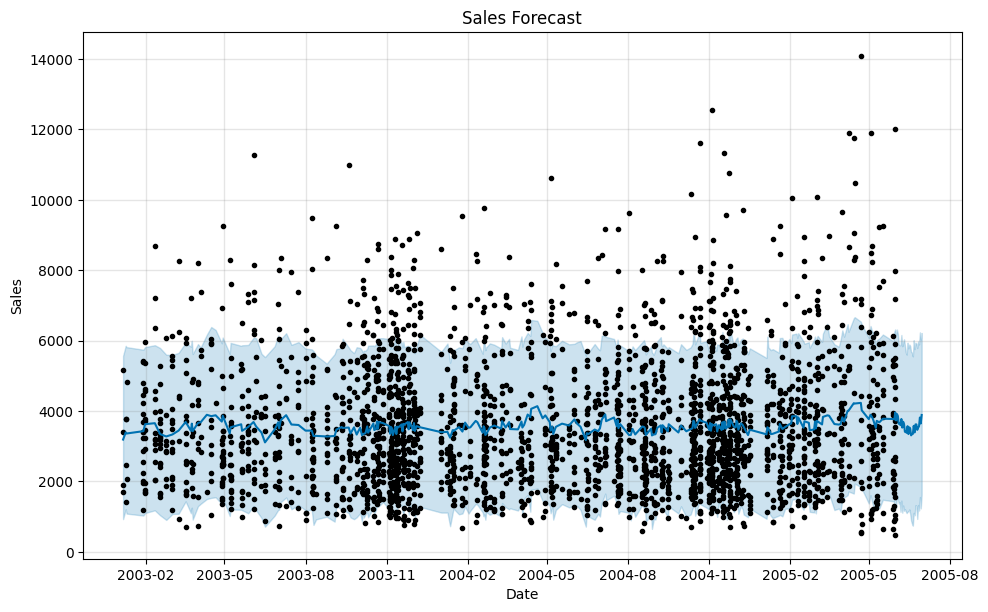

In [ ]:
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
test_forecast = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]
y_true = test['y'].values
y_pred = test_forecast['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 1448.40, RMSE: 1576.48


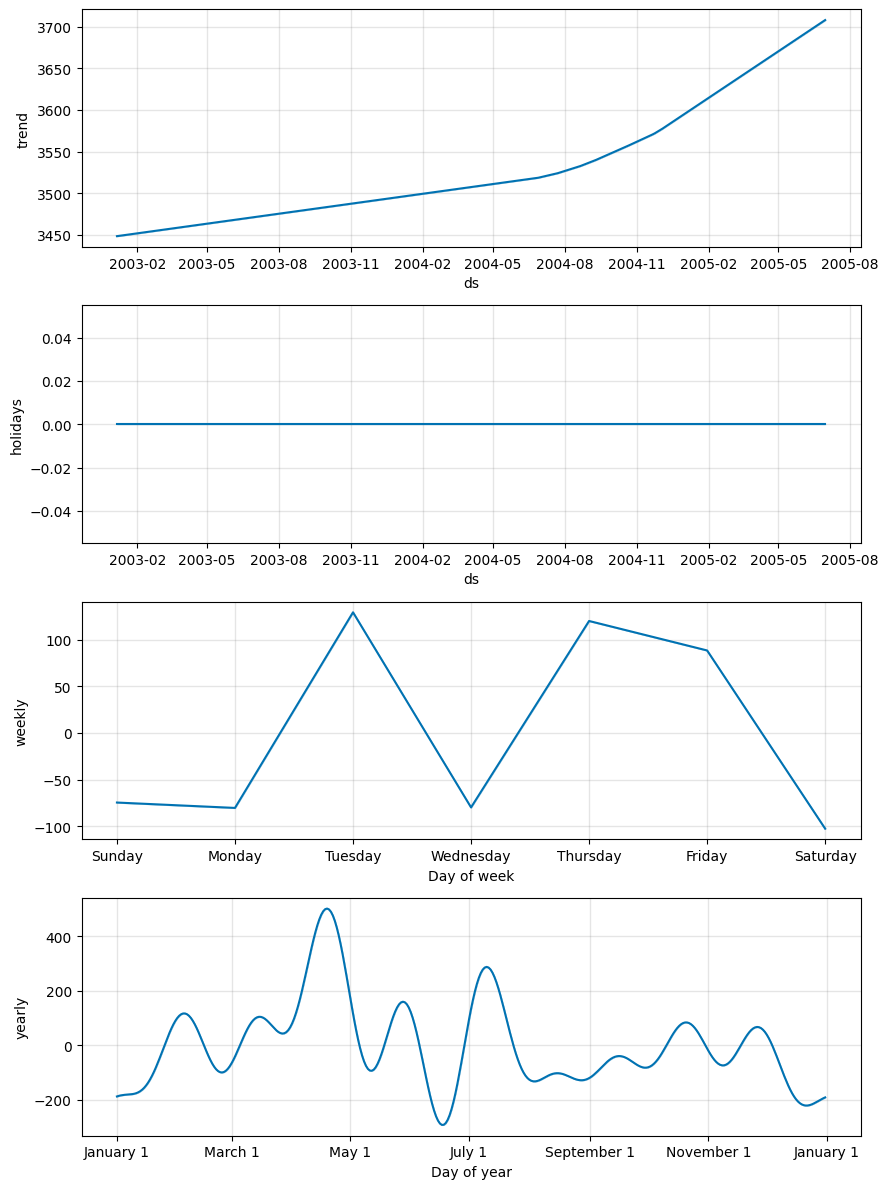

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='90 days')
df_p = performance_metrics(df_cv)
print(df_p.head())


INFO:prophet:Making 3 forecasts with cutoffs between 2004-03-07 00:00:00 and 2005-03-02 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmps8k0oxf4/e7usz8we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps8k0oxf4/6q25l4t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6563', 'data', 'file=/tmp/tmps8k0oxf4/e7usz8we.json', 'init=/tmp/tmps8k0oxf4/6q25l4t3.json', 'output', 'file=/tmp/tmps8k0oxf4/prophet_modelng0b20x1/prophet_model-20250528092736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmps8k0oxf4/7cvv_sl7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps8k0oxf4/v55fikub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  horizon           mse         rmse          mae      mape     mdape  \
0  7 days  3.705814e+06  1925.049030  1523.132088  0.479157  0.385660   
1  8 days  3.575214e+06  1890.823603  1524.576785  0.483237  0.391366   
2 12 days  3.669017e+06  1915.467737  1561.842229  0.545198  0.415630   
3 13 days  3.602618e+06  1898.056295  1573.768352  0.553126  0.452155   
4 15 days  3.818829e+06  1954.182352  1603.560510  0.546433  0.470051   

      smape  coverage  
0  0.413078  0.820000  
1  0.415515  0.817500  
2  0.439593  0.808125  
3  0.447577  0.826250  
4  0.447945  0.823846  


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
import warnings
import plotly.io as pio

# Set Colab renderer for Plotly
pio.renderers.default = 'colab'

# Remove microseconds to avoid nanosecond warning
forecast['ds'] = forecast['ds'].apply(lambda x: x.replace(microsecond=0))

# Optionally suppress the specific warning (if still appears)
warnings.filterwarnings("ignore", message="Discarding nonzero nanoseconds in conversion")

# Plot interactive forecast and components
plot_plotly(model, forecast)
plot_components_plotly(model, forecast)
